LeNet-5 has:

- 2 Convolutional layers.
- 3 Fully connected layers.
- 2 Average pooling layers.
- Tanh as activation function for hidden layer.
- Softmax as activation function for output layer.
- 60000 trainable parameters.
- Cross-entropy as cost function
- Gradient descent as optimizer.

In [2]:
# IMPORTING THE NECESSARY LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf;


In [8]:
# LOADING THE MNIST DATASET

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_val, y_val = X_train[55000:, ..., np.newaxis], y_train[55000:]
X_train, y_train = X_train[:55000, ..., np.newaxis], y_train[:55000]
X_test = X_test[..., np.newaxis]


In [9]:
print(f"Image Shape: {X_train[0].shape}")

Image Shape: (28, 28, 1)


In [10]:
len(X_train)

55000

In [11]:
len(X_test)

10000

In [12]:
len(X_val)

5000

In [13]:
# NORMALIZATION OF OUR DATASET

X_train, X_test, X_val = X_train/255.0, X_test/255.0, X_val/255.0

In [14]:
X_train -= np.mean(X_train)
X_val -= np.mean(X_val)
X_test -= np.mean(X_test)

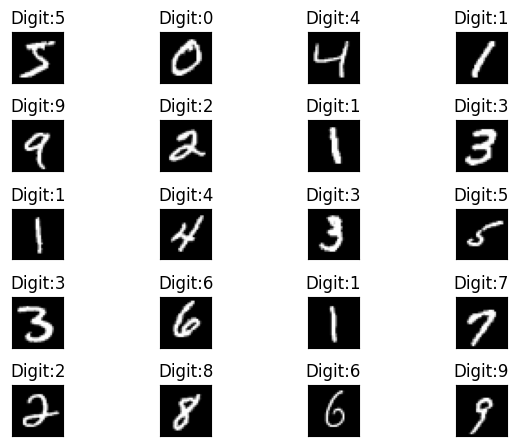

In [17]:
# VISUALIZING THE DATA

def plot_digits(X, y):
    for i in range(20):
        plt.subplot(5,4, i+1)
        plt.tight_layout()
        plt.imshow(X_train[i], cmap="gray")
        plt.title(f'Digit:{y[i]}')
        plt.xticks([])
        plt.yticks([])

    plt.show()

plot_digits(X_train, y_train)
                   


In [24]:
# BUILDING THE MODEL

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation="tanh",padding="valid"),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding="valid"),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(120, activation="tanh"),
    tf.keras.layers.Dense(84, activation="tanh"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)



2024-07-27 21:28:02.685488: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-27 21:28:03.950999: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-27 21:28:03.951074: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-27 21:28:03.962399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-27 21:28:03.962496: I tensorflow/compile

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_3 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_4 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               3

In [26]:
history = model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=20)
model.save("leNet5_model.h5")

Epoch 1/20


2024-07-27 21:29:35.140013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-07-27 21:29:36.215456: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-27 21:29:36.994077: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9790064060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-27 21:29:36.994194: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-07-27 21:29:37.483705: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-27 21:29:37.631916: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 [==============================] - 22s 10ms/step - loss: 0.6600 - accuracy: 0.8193 - val_loss: 0.2683 - val_accuracy: 0.9280
Epoch 2/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2924 - accuracy: 0.9146 - val_loss: 0.1940 - val_accuracy: 0.9488
Epoch 3/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2208 - accuracy: 0.9354 - val_loss: 0.1489 - val_accuracy: 0.9600
Epoch 4/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.1753 - accuracy: 0.9487 - val_loss: 0.1248 - val_accuracy: 0.9676
Epoch 5/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.1442 - accuracy: 0.9577 - val_loss: 0.1067 - val_accuracy: 0.9722
Epoch 6/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.1227 - accuracy: 0.9647 - val_loss: 0.0941 - val_accuracy: 0.9746
Epoch 7/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.1071 - accuracy: 0.9688 - val_loss: 0.0865 - val_accura

/home/anson/anaconda3/envs/py31/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# EVALUATING THE MODEL

model = tf.keras.models.load_model('leNet5_model.h5')

preds = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [28]:
y_pred = np.argmax(preds, axis=1)

In [29]:
print('Test set error rate: {}'.format(np.mean(y_pred == y_test)))

Test set error rate: 0.9858



Some correct classification:


TypeError: plot_digits() takes 2 positional arguments but 3 were given


Plot of training error over 20 epochs:


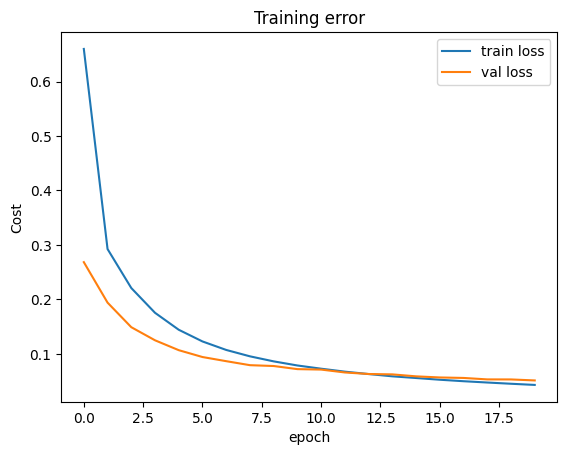

In [32]:
print('\nPlot of training error over 20 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()